## Importing libraries and Data

In [373]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

path = 'dataset/Train.csv'

In [374]:
pd.set_option('display.max_columns', 60)

df = pd.read_csv(path)
df.head()

,ID,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,12554,current,M,35,708,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26.0,10.0,48.0,14.0,47.0,430000.0,1.0,1.0,1.0,1.0,593.20,1244.14,787.0,6885.0,85919.48,25192.00,24.0,6.0,25296.0,11527.50,191777.13,2.0,40.0,24563.0,30051.32,12761.0,2.0,65.0,50836.0,Y,1674.09,20014.0
1,17645,current,M,35,123,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.0,7.0,13.0,3.0,21.0,31.0,127500.0,1.0,1.0,1.0,1.0,213557.15,172678.56,90525.0,1500.0,12255.75,88693.37,35.0,36.0,80750.0,92276.57,71162.00,2.0,78.0,23948.0,42119.05,76206.0,21.0,63.0,23226.0,Y,13043.34,10173.0
2,7604,current,M,55,802,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32.0,102.0,4.0,1.0,80.0,199999.0,1.0,1.0,1.0,1.0,165907.57,470000.00,25524.0,3735.0,34193.00,84880.00,72.0,9.0,38466.0,19343.00,70978.00,2.0,82.0,10752.0,58373.25,75283.0,7.0,1.0,27036.0,Y,25375.27,16095.0
3,1590,current,F,29,867,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1.0,50.0,1.0,1.0,10.0,155000.0,1.0,1.0,1.0,1.0,81872.65,223379.40,48500.0,-4679.0,11558.23,236326.00,43.0,30.0,52732.0,43867.91,63033.84,23.0,38.0,12607.0,69851.51,68708.0,21.0,83.0,43037.0,Y,3544.33,7707.0
4,16556,current,M,34,802,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47.0,82.0,54.0,16.0,68.0,297000.0,1.0,1.0,1.0,1.0,568.80,385000.00,183999.0,6916.0,17022.81,58897.03,46.0,36.0,19613.0,153253.71,30286.00,24.0,50.0,25213.0,10071.00,80140.0,8.0,32.0,32044.0,Y,12780.44,96408.0


## Dropping irrelevant columns

In [375]:
df = df.drop(
    [   
        'ID',
        'region_code',
        
        'personal_loan_active', 
        'personal_loan_closed', 
        'vehicle_loan_active', 
        'vehicle_loan_closed', 
        
        'debit_count_apr',
        'debit_count_may',
        'debit_count_jun',
        
        'credit_count_apr',
        'credit_count_may',
        'credit_count_jun',
        
        'loan_enq'
        
    ], axis=1)

## Combinig April, May, June cc and dc consumption

In [376]:
no_of_months = 3

df['cc_cons_avg'] = (df.cc_cons_apr + df.cc_cons_may + df.cc_cons_jun) / no_of_months
df['dc_cons_avg'] = (df.dc_cons_apr + df.dc_cons_may + df.cc_cons_jun) / no_of_months

In [377]:
df = df.drop([
        'cc_cons_apr',
        'cc_cons_may',
        'cc_cons_jun',

        'dc_cons_apr',
        'dc_cons_may',
        'dc_cons_jun',
    
        'cc_count_apr',
        'cc_count_may',
        'cc_count_jun',
    
        'dc_count_apr',
        'dc_count_may',
        'dc_count_jun',
    
    ], axis=1)

## Dropping rows with credit limit 0

In [378]:
df = df[df.card_lim > 0]

## Imputing age > 70 with mode 

In [379]:
mode = df.loc[df.age <= 70, 'age'].mode()

df.loc[df.age > 70, 'age'] = np.nan
df = df.fillna(mode)

df.describe()

,age,card_lim,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,max_credit_amount_jun,emi_active,cc_cons,cc_cons_avg,dc_cons_avg
count,14433.000000,14964.000000,1.496400e+04,1.496400e+04,14964.000000,14964.000000,1.496400e+04,1.496400e+04,1.496400e+04,1.496400e+04,1.496400e+04,1.496400e+04,1.496400e+04,1.496400e+04,1.496400e+04,1.496400e+04,14964.000000,14964.000000,14964.000000
mean,42.664450,277671.559142,6.198422e+05,2.332940e+05,44462.971057,3522.067082,6.828904e+04,8.080678e+04,5.439408e+04,6.552806e+04,8.356510e+04,5.720811e+04,7.618873e+04,7.851045e+04,5.260045e+04,1.574706e+04,55125.981957,15477.751817,9338.188769
std,12.199736,179129.458463,3.089789e+06,4.071666e+05,88152.871269,7368.374949,1.127828e+05,1.991243e+05,1.953064e+05,1.017335e+05,1.777223e+05,2.002474e+05,1.546512e+05,1.483396e+05,1.283941e+05,1.180395e+05,97593.000279,13801.311900,10088.363527
min,25.000000,10000.000000,3.000000e-01,3.000000e+00,462.000000,-12179.000000,4.010000e+00,6.138000e+01,1.000000e+00,2.820000e+01,1.061000e+01,2.500000e-01,5.230000e+00,1.188000e+01,6.000000e-02,0.000000e+00,0.000000,514.956667,380.506667
25%,33.000000,124000.000000,6.100000e+03,3.817300e+04,2214.000000,0.000000,2.328507e+04,2.684600e+04,2.068225e+04,2.100333e+04,2.541027e+04,2.008300e+04,2.571067e+04,2.492008e+04,1.903950e+04,1.550865e+03,6764.750000,7334.617083,4115.643333
50%,38.000000,272000.000000,4.524950e+04,1.110000e+05,13873.000000,2351.000000,4.197025e+04,4.704900e+04,3.191400e+04,3.823568e+04,4.814000e+04,3.140300e+04,4.584750e+04,4.587936e+04,3.042550e+04,3.953580e+03,13364.000000,11818.423333,6773.078333
75%,53.000000,400000.000000,1.617040e+05,2.450000e+05,48950.000000,6885.000000,7.537767e+04,8.591945e+04,5.255900e+04,7.440055e+04,9.457115e+04,5.590796e+04,8.464518e+04,8.551100e+04,5.320200e+04,9.372410e+03,20105.750000,19073.650833,11220.295000
max,69.000000,1000000.000000,6.597743e+07,5.000000e+06,610000.000000,35346.000000,5.156864e+06,1.059212e+07,1.202915e+07,4.252567e+06,1.060175e+07,1.000000e+07,6.539810e+06,6.611953e+06,5.200000e+06,7.447125e+06,408382.000000,387231.370000,314984.483333


## Handling Outliers

### Numerical columns

In [380]:
num_cols = df.select_dtypes(exclude='object').columns

### Boxplots for outlier visualisation

In [381]:
# for col in num_cols:
    
#     sns.boxplot(df[col])
#     plt.show()

### Finding IQR for all columns

In [382]:
q1 = df.quantile(0.05)  # 0.25
q3 = df.quantile(0.95)  # 0.75

iqr = q3 - q1
iqr

age                      3.800000e+01
card_lim                 5.480000e+05
investment_1             1.982688e+06
investment_2             9.683689e+05
investment_3             2.225168e+05
investment_4             2.604638e+04
debit_amount_apr         1.964465e+05
credit_amount_apr        2.321430e+05
max_credit_amount_apr    1.360388e+05
debit_amount_may         1.969674e+05
credit_amount_may        2.415725e+05
max_credit_amount_may    1.499100e+05
debit_amount_jun         2.114515e+05
credit_amount_jun        2.306414e+05
max_credit_amount_jun    1.501900e+05
emi_active               3.643160e+04
cc_cons                  3.084732e+05
cc_cons_avg              3.611974e+04
dc_cons_avg              2.276247e+04
dtype: float64

## Dropping outliers 
### entries with values < 1.5 X IQR or > 1.5 X IQR

In [383]:
df = df[~((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis=1)]
df.head()

,account_type,gender,age,card_lim,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,max_credit_amount_jun,emi_active,cc_cons,cc_cons_avg,dc_cons_avg
0,current,M,35.0,430000.0,593.20,1244.14,787.0,6885.0,85919.48,25192.00,25296.0,11527.50,191777.13,24563.0,30051.32,12761.0,50836.0,1674.09,20014.0,17157.466667,15444.466667
1,current,M,35.0,127500.0,213557.15,172678.56,90525.0,1500.0,12255.75,88693.37,80750.0,92276.57,71162.00,23948.0,42119.05,76206.0,23226.0,13043.34,10173.0,14610.206667,1823.333333
2,current,M,55.0,199999.0,165907.57,470000.00,25524.0,3735.0,34193.00,84880.00,38466.0,19343.00,70978.00,10752.0,58373.25,75283.0,27036.0,25375.27,16095.0,10533.206667,10204.453333
3,current,F,29.0,155000.0,81872.65,223379.40,48500.0,-4679.0,11558.23,236326.00,52732.0,43867.91,63033.84,12607.0,69851.51,68708.0,43037.0,3544.33,7707.0,20206.793333,9298.380000
4,current,M,34.0,297000.0,568.80,385000.00,183999.0,6916.0,17022.81,58897.03,19613.0,153253.71,30286.00,25213.0,10071.00,80140.0,32044.0,12780.44,96408.0,4642.133333,3655.346667


In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12814 entries, 0 to 14998
Data columns (total 21 columns):
account_type             12814 non-null object
gender                   12814 non-null object
age                      12373 non-null float64
card_lim                 12814 non-null float64
investment_1             12814 non-null float64
investment_2             12814 non-null float64
investment_3             12814 non-null float64
investment_4             12814 non-null float64
debit_amount_apr         12814 non-null float64
credit_amount_apr        12814 non-null float64
max_credit_amount_apr    12814 non-null float64
debit_amount_may         12814 non-null float64
credit_amount_may        12814 non-null float64
max_credit_amount_may    12814 non-null float64
debit_amount_jun         12814 non-null float64
credit_amount_jun        12814 non-null float64
max_credit_amount_jun    12814 non-null float64
emi_active               12814 non-null float64
cc_cons                  1281

## Managing Skewed Data

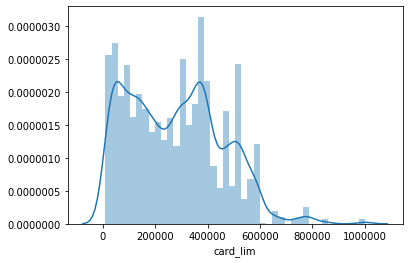

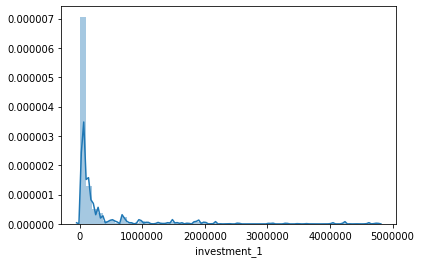

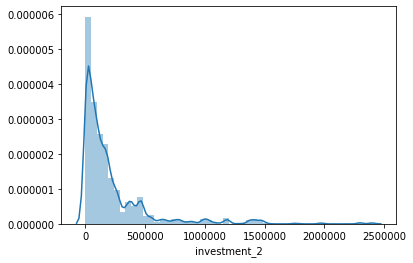

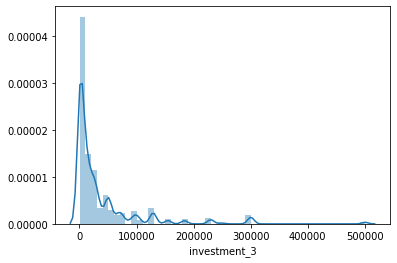

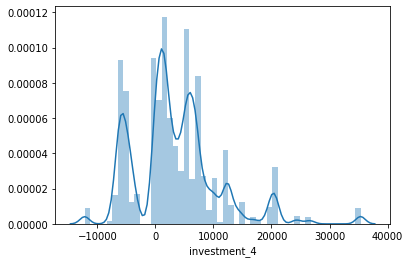

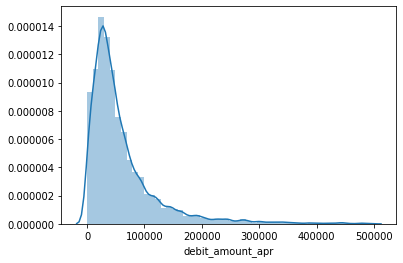

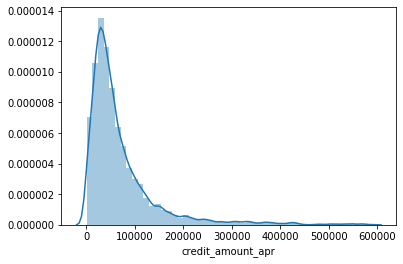

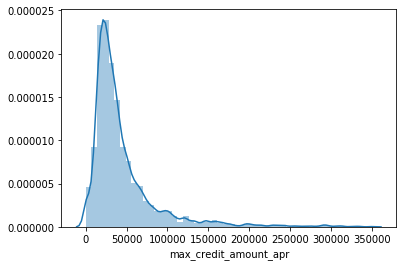

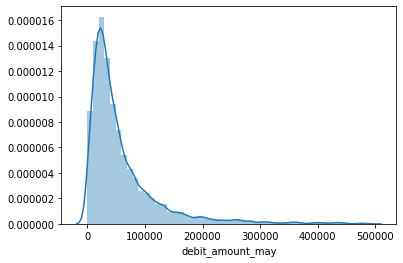

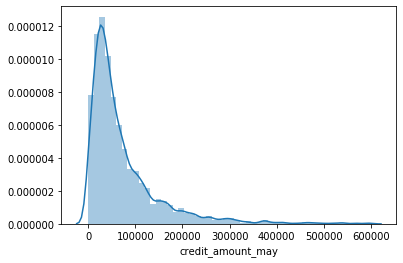

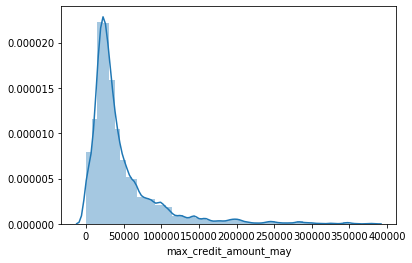

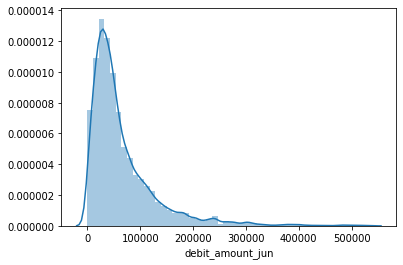

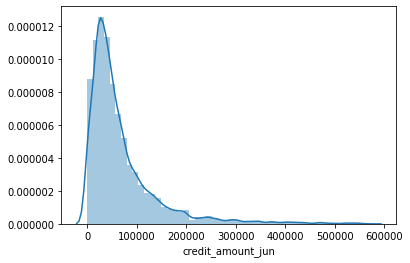

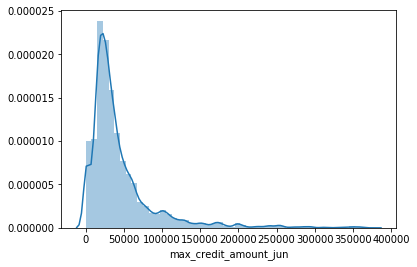

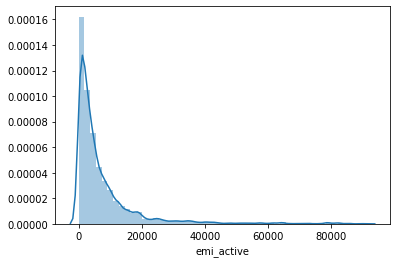

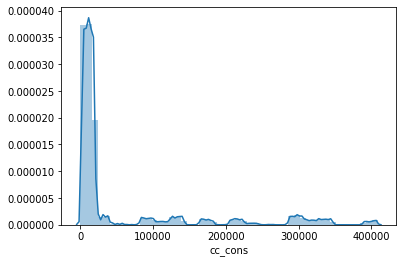

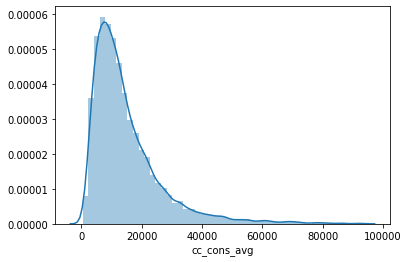

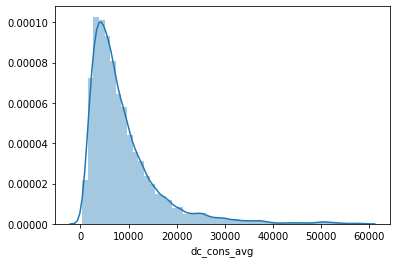

In [385]:
for col in num_cols:
    
    if any(df[col].isna()):
        continue
    
    sns.distplot(df[col])
    plt.show()

## Normalising Right Skewed Data with Log Transformation

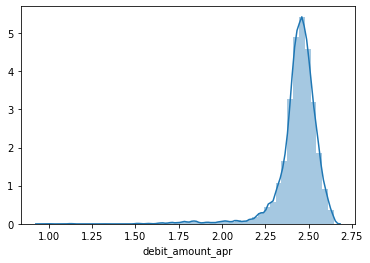

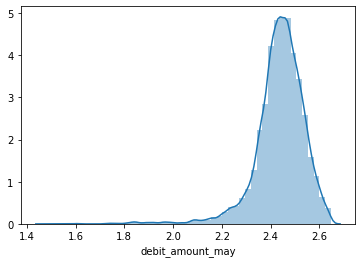

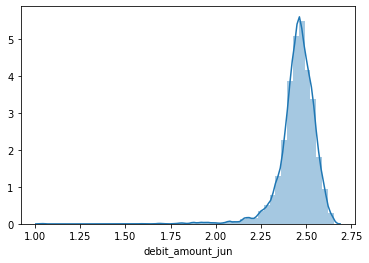

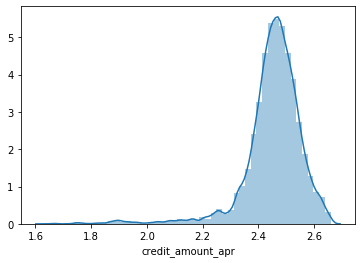

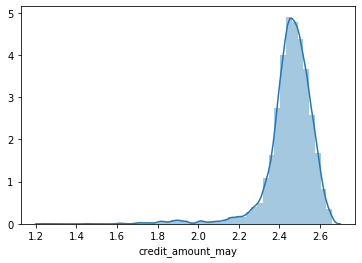

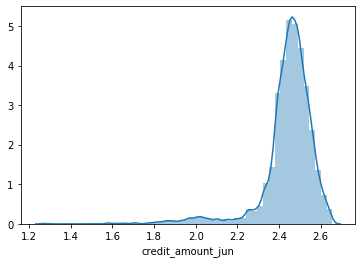

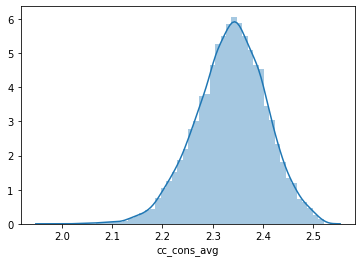

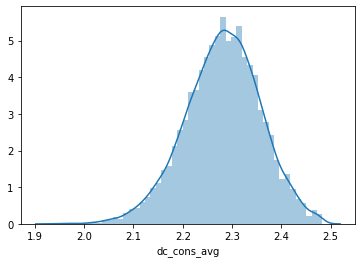

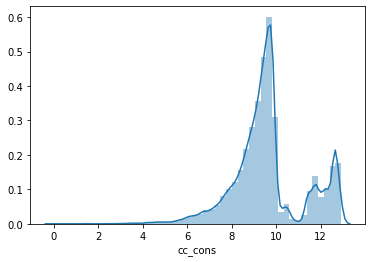

In [426]:
right_skewed_cols = [
    
    'debit_amount_apr',
    'debit_amount_may',
    'debit_amount_jun',
    
    'credit_amount_apr',
    'credit_amount_may',
    'credit_amount_jun',
    
    'cc_cons_avg',
    'dc_cons_avg',
    
    'cc_cons'
]


def log_transfrom(col):
    
    transformed_col = np.log1p(df[col])
    sns.distplot(transformed_col)
    plt.show()
    
    return transformed_col


for col in right_skewed_cols:
    
    df[col] = log_transfrom(col)

## Visualising Relationships among data

In [425]:
# def scatter_plot(col):
    
#     sns.scatterplot(df[col], df.cc_cons)
#     plt.show()
    
# for col in num_cols:
#     scatter_plot(col)

## Importing Models

In [434]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

In [428]:
# Root Mean Squared Logarithmic Error

def rmsle(y_test, y_pred):
    
    sum=0.0
    
    for x,y in zip(y_test, y_pred):
        
        if x < 0 or y < 0: #check for negative values. 
            continue
        
        p = np.log(y+1)
        r = np.log(x+1)
        sum += (p - r)**2
    
    return (sum / len(y_pred)) ** 0.5

## Label Encoding gender and account_type

In [429]:
encoder = LabelEncoder()

df.gender       = encoder.fit_transform(df.gender)
df.account_type = encoder.fit_transform(df.account_type)

In [430]:
df['age'].fillna(33, inplace=True)

## Splitting data into train and test

In [431]:
df.columns

Index(['account_type', 'gender', 'age', 'card_lim', 'investment_1',
       'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr',
       'credit_amount_apr', 'max_credit_amount_apr', 'debit_amount_may',
       'credit_amount_may', 'max_credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'max_credit_amount_jun', 'emi_active', 'cc_cons',
       'cc_cons_avg', 'dc_cons_avg'],
      dtype='object')

In [440]:
X = df[['account_type', 'gender', 'age', 'card_lim', 'investment_1',
       'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr',
       'credit_amount_apr', 'max_credit_amount_apr', 'debit_amount_may',
       'credit_amount_may', 'max_credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'max_credit_amount_jun', 'emi_active',
       'cc_cons_avg', 'dc_cons_avg']]
y = df.cc_cons

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6, train_size=0.3)

In [442]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)
score  = rmsle(y_test, y_pred)

print("RSMLE Score: ", score)

RSMLE Score:  0.15804648329663462
